In [82]:
from pprint import pformat as pf, pprint as pp
import json
import logging

log = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

import requests
import pandas as pd
import numpy as np
import statsmodels
from statsmodels.tsa import stattools
from matplotlib.pylab import plt
%matplotlib inline

print(statsmodels.__version__)
print(np.__version__)
print(pd.__version__)

0.10.1
1.17.2
0.25.1


In [58]:
url = 'http://192.168.0.156:8000/metrics?from=30'

In [59]:
response = requests.get(url)

In [60]:
data = json.loads(response.content.decode('utf-8'))

In [61]:
# Tidy Data
df = pd.DataFrame(data)
df['ts'] = pd.to_datetime(df['ts'], unit='s')
df = df.set_index('ts')
del df['id']

In [62]:
df = df[df['metric'] == 'temperature'][['value']].resample('H').mean()
df = df.dropna()

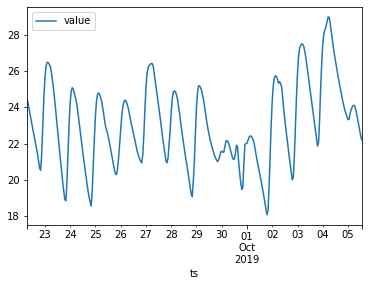

In [63]:
df.plot()

In [64]:
df_lag = df.shift()

In [65]:
df_diff = df - df_lag

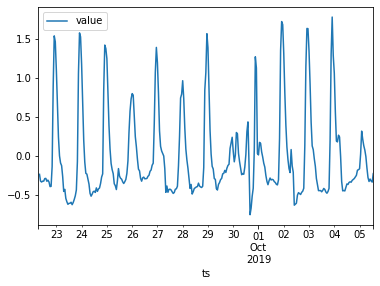

In [66]:
df_diff.plot()

In [67]:
df_acf = pd.DataFrame(stattools.acf(df.dropna(), fft=True))

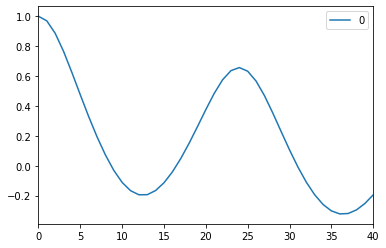

In [68]:
df_acf.plot()

In [79]:
df_pacf = pd.DataFrame(stattools.pacf(df.dropna(), method='ols-inefficient'))

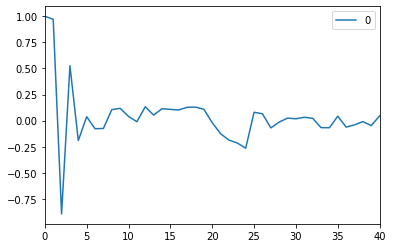

In [80]:
df_pacf.plot()